**Hillman Ltd** has introduced a CCTV tracking process on the main gates, as it
suspects unauthorized offloading of goods is happening through its harbor port’s
warehouse. You will load a set of digits from the cameras, to assist the company to read
the numbers on the side of the containers that left the warehouse.

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

#Load the digits from the preprocessed image software.
digits = load_digits()
#You now apply the transformation to project from 64 to 2 dimensions.

(1797, 64)
(1797, 2)


<Figure size 720x1080 with 0 Axes>

Text(0.5, 0, 'Value 1')

Text(0, 0.5, 'Value 2')

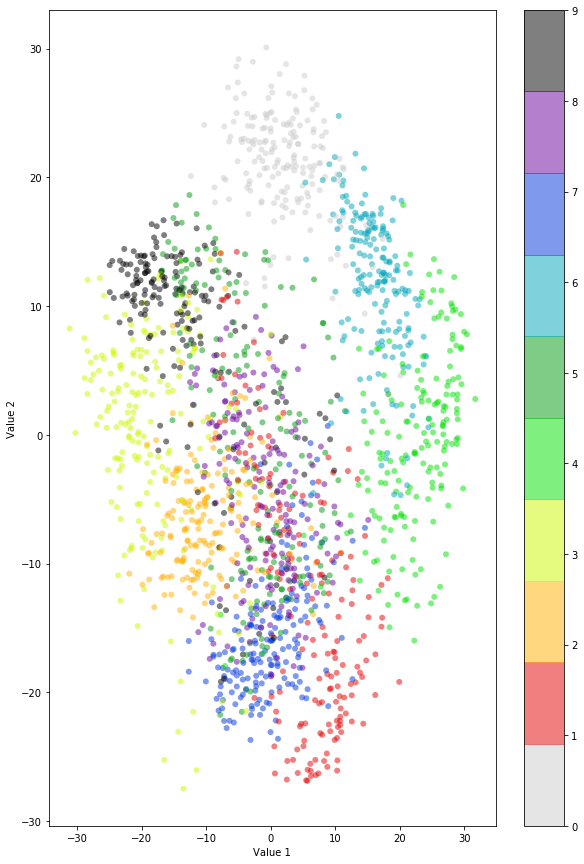

In [2]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

#Display your findings.
plt.figure(figsize=(10, 15))
plt.scatter(projected[:, 0], projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
plt.xlabel('Value 1')
plt.ylabel('Value 2')
plt.colorbar()

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explained variance')

12

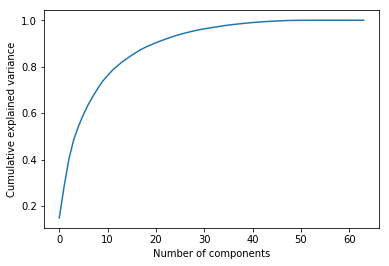

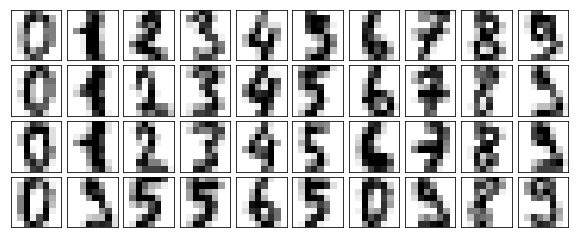

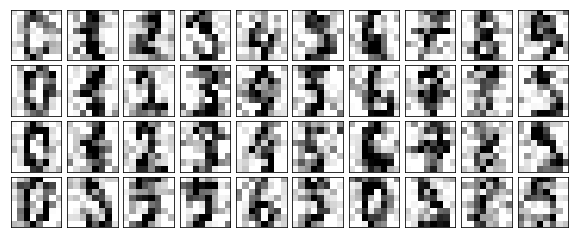

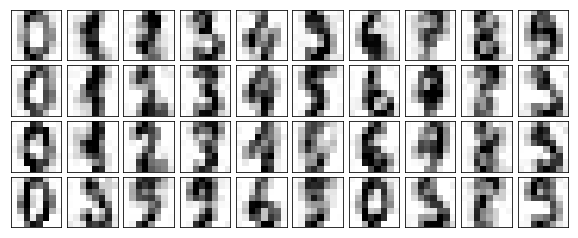

In [4]:
#Apply the PCA transform.
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
#You will require the following function to plot the digits:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
        cmap='binary', interpolation='nearest',
        clim=(0, 16))

        #You can now plot results.
plot_digits(digits.data)

#One of the cameras, however, has not generated perfect images.
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

#You can still use the data; it just needs more processing.
pca = PCA(0.50).fit(noisy)
pca.n_components_

#You can determine the distortion by filtering the noise factors.
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)

#Visualize your results:
plot_digits(filtered)